In [43]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#data loading
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#data cleanup
df["job_posted_date"]= pd.to_datetime(df["job_posted_date"]) 
df["job_skills"] = df["job_skills"].apply(lambda skill_list : ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [44]:
df = df[df["job_title_short"] == "Data Scientist"]

In [45]:
df_explode = df.explode("job_skills")


In [46]:
df_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC",sql,"{'analyst_tools': ['excel'], 'cloud': ['azure'..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC",python,"{'analyst_tools': ['excel'], 'cloud': ['azure'..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC",r,"{'analyst_tools': ['excel'], 'cloud': ['azure'..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC",mongodb,"{'analyst_tools': ['excel'], 'cloud': ['azure'..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC",mongodb,"{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785725,Data Scientist,Analytics Engineer,Jerman,melalui Startup Jobs,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,Planet,bigquery,"{'cloud': ['bigquery'], 'libraries': ['gdpr'],..."
785725,Data Scientist,Analytics Engineer,Jerman,melalui Startup Jobs,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,Planet,gdpr,"{'cloud': ['bigquery'], 'libraries': ['gdpr'],..."
785725,Data Scientist,Analytics Engineer,Jerman,melalui Startup Jobs,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,Planet,git,"{'cloud': ['bigquery'], 'libraries': ['gdpr'],..."
785725,Data Scientist,Analytics Engineer,Jerman,melalui Startup Jobs,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,Planet,gitlab,"{'cloud': ['bigquery'], 'libraries': ['gdpr'],..."


In [51]:
# so we are going to do this grouping for first time in which we will be having a single column grouped in two manner side by side

# a lenghty way of doing this is to group them individually and then merging them on the common column but it has its problem and i tried it.


skill_stats = df_explode.groupby("job_skills").agg( 
    skills_count =("job_skills", "count") ,
    median_salary = ("salary_year_avg", "median")
)

skill_stats = skill_stats.sort_values(by="skills_count", ascending=False).head(10)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19684\2253780278.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text( skill_stats["skills_count"].iloc[i], skill_stats["median_salary"][i], txt )


<function matplotlib.pyplot.show(close=None, block=None)>

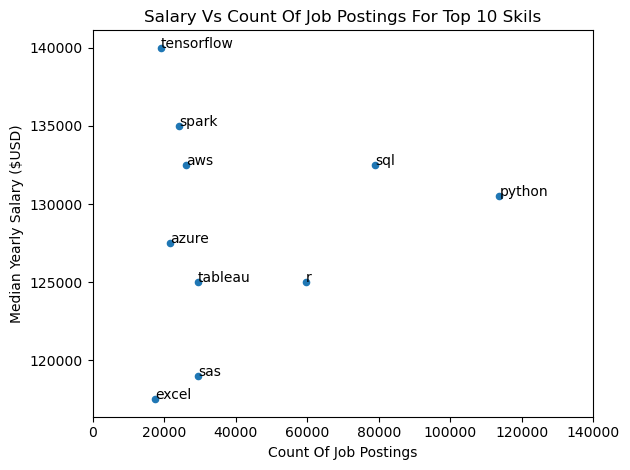

In [55]:
skill_stats.plot(kind="scatter", x = "skills_count" , y= "median_salary")

plt.xlabel("Count Of Job Postings")
plt.ylabel("Median Yearly Salary ($USD)")
plt.title("Salary Vs Count Of Job Postings For Top 10 Skils")

# now we are going to write a for loop to lavel all the points in the scatterplot aws there is no easy direct way to do it.
# there is an easy way in seaborn library but we will study that later

for i, txt in enumerate ( skill_stats.index):
    plt.text( skill_stats["skills_count"].iloc[i], skill_stats["median_salary"][i], txt )


plt.xlim(0,140000)
plt.tight_layout()
plt.show

In [37]:
# df_median.reset_index(name = "skill_pay")

# df_count = df_explode["job_skills"].value_counts()
# df_count.reset_index(name = "job_count")

# df_merged = pd.merge(df_count,df_median,on="job_skills", how="inner").head(10)

# df_merged.plot(kind = "scatter" , x ="count" , y = "salary_year_avg" , legend=True)

# this was my method and it had some flaw
# 1 - when i merged them the coulmns name were differnet from what they were initially named


,job_skills,skill_pay
0,airflow,111175.0
1,airtable,90000.0
2,alteryx,105000.0
3,angular,109101.0
4,angular.js,NaN
...,...,...
230,wrike,75000.0
231,wsl,NaN
232,xamarin,NaN
233,yarn,99150.0
